## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# setting up styles for visualizations
sns.set(style="whitegrid")

# importing models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

### Read Data

In [2]:
# setting options to display max rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('students_adaptability_level_online_education.csv')

### Generate Data Profiling Report

In [4]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [6]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [7]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [8]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

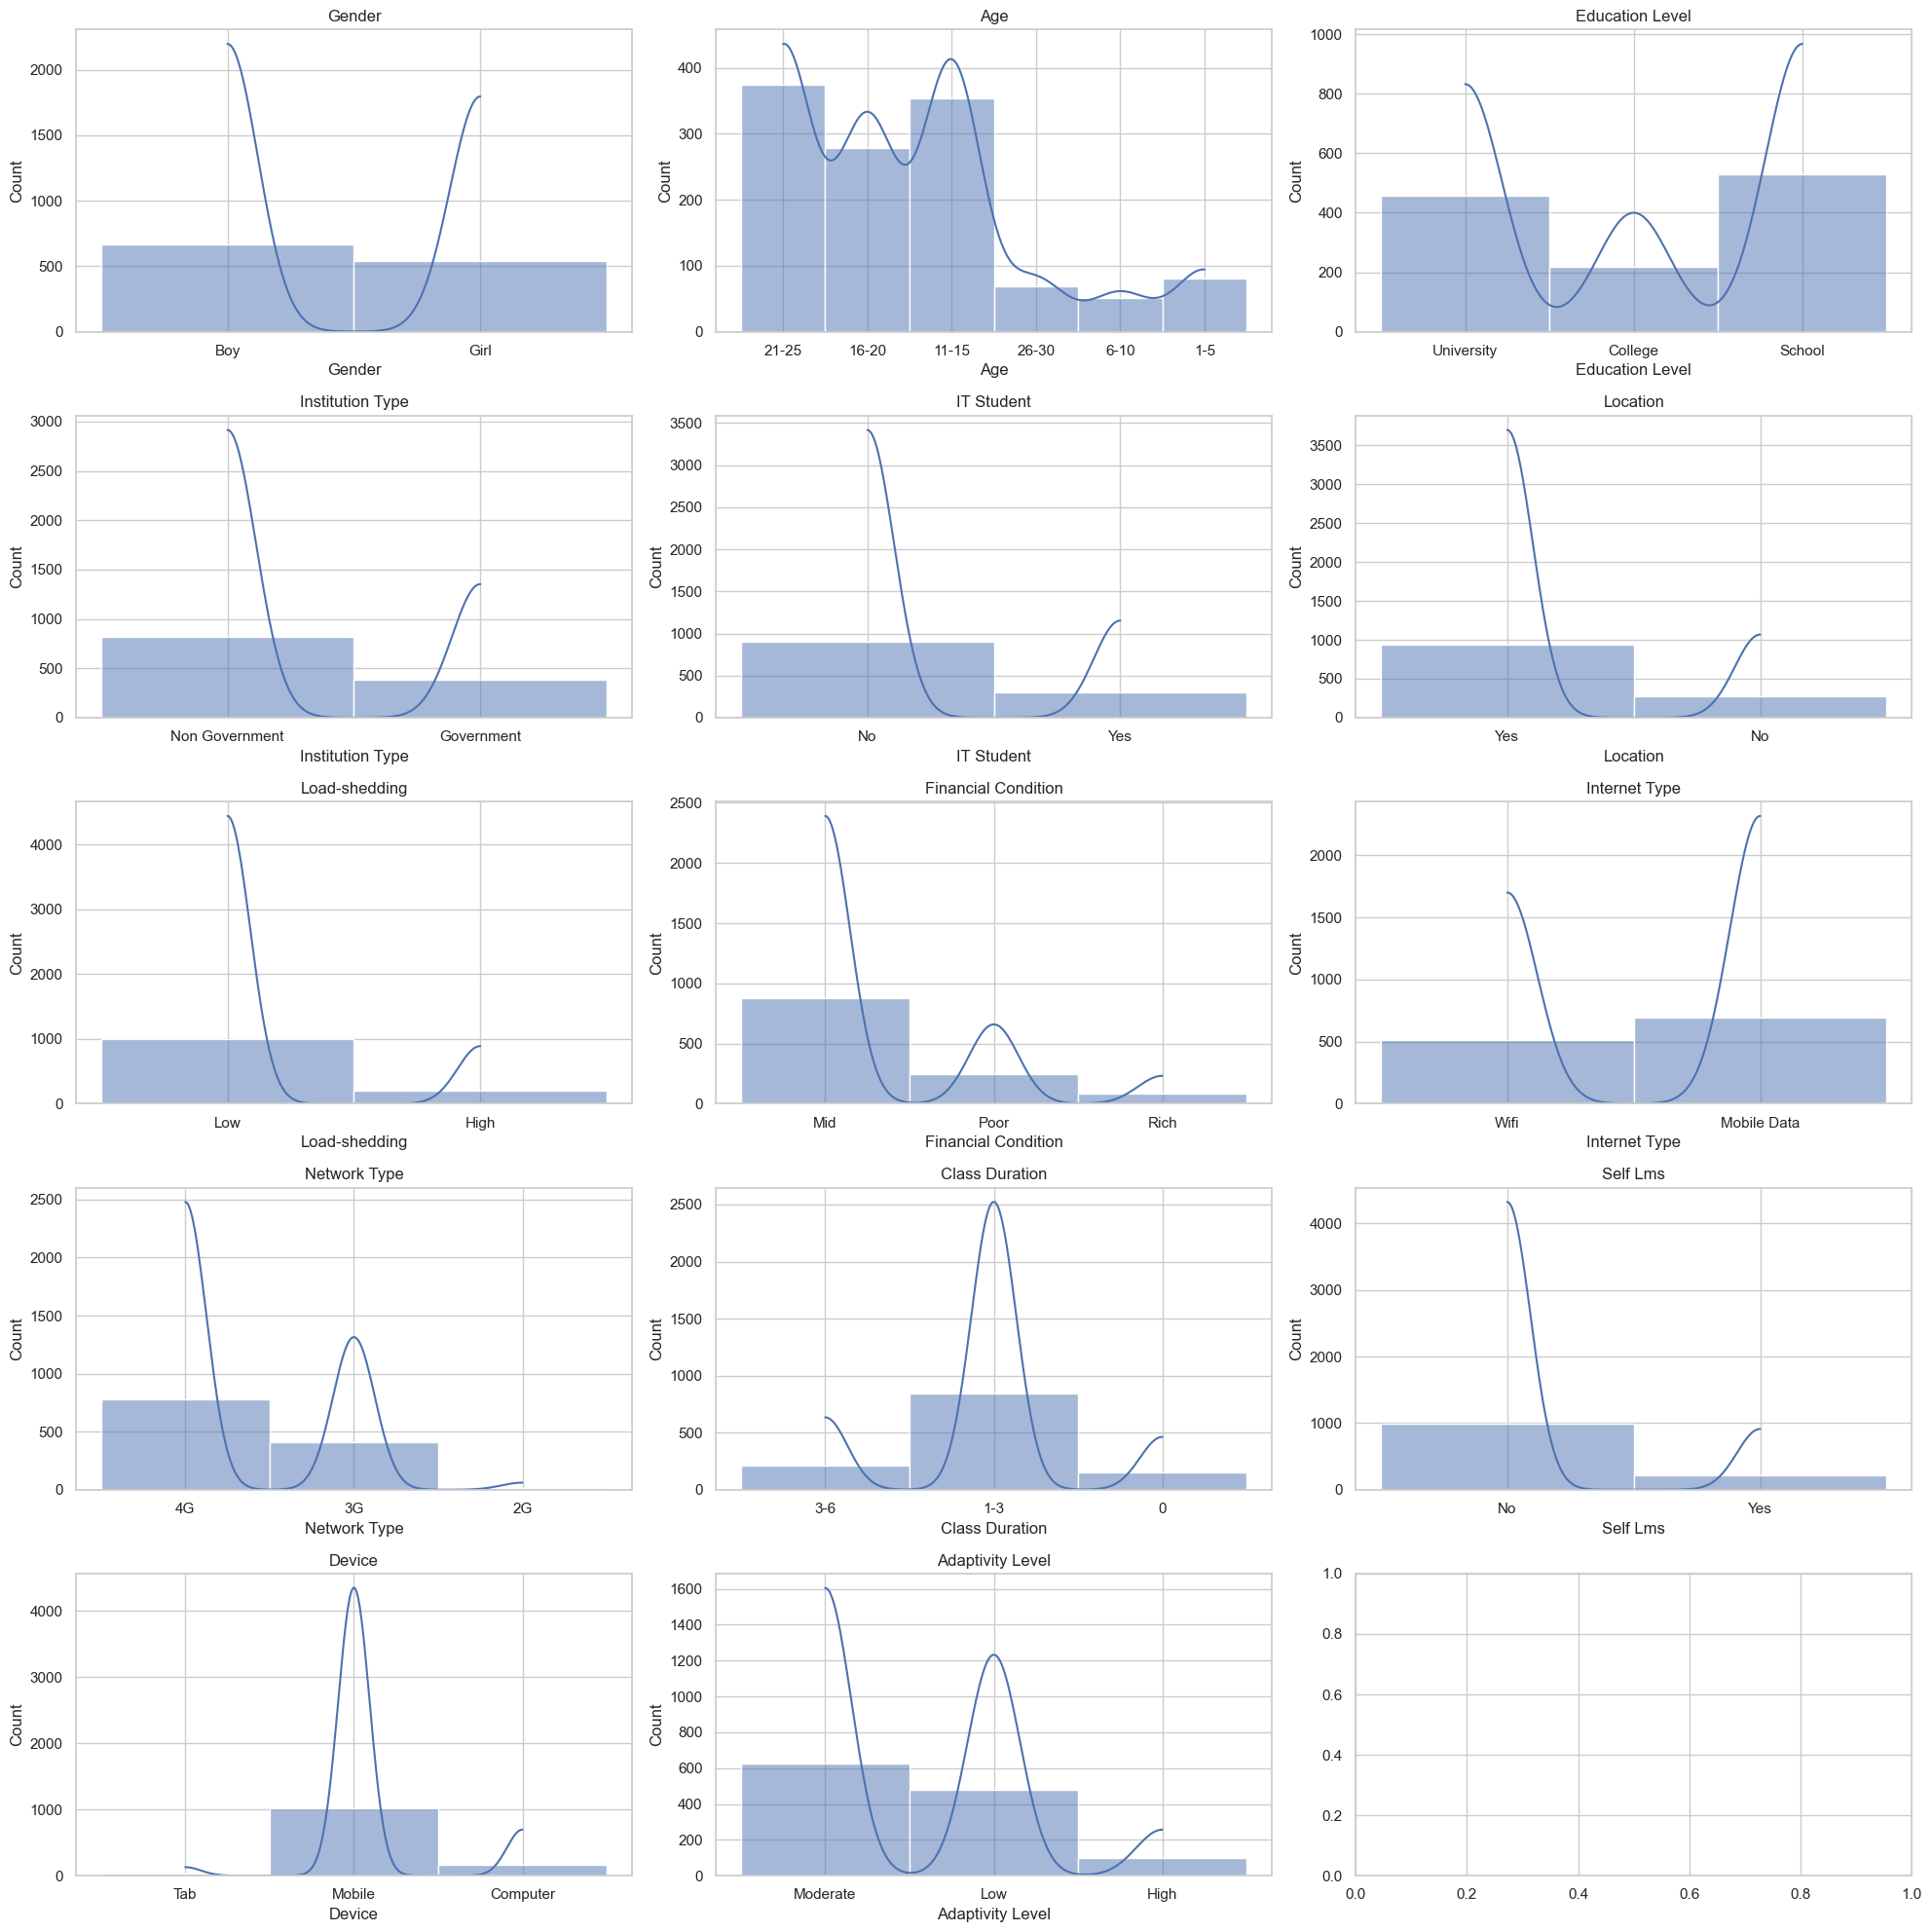

In [9]:
# Plotting distributions of various features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

In [12]:
for col in columns:
    print("Column: ", col)
    print("Unique Values: ", df[col].unique())
    print("Value Counts: \n", df[col].value_counts().to_string(header=False))
    print("-------------------------------------------------------------------")

Column:  Gender
Unique Values:  ['Boy' 'Girl']
Value Counts: 
 Boy     663
Girl    542
-------------------------------------------------------------------
Column:  Age
Unique Values:  ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Value Counts: 
 21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
-------------------------------------------------------------------
Column:  Education Level
Unique Values:  ['University' 'College' 'School']
Value Counts: 
 School        530
University    456
College       219
-------------------------------------------------------------------
Column:  Institution Type
Unique Values:  ['Non Government' 'Government']
Value Counts: 
 Non Government    823
Government        382
-------------------------------------------------------------------
Column:  IT Student
Unique Values:  ['No' 'Yes']
Value Counts: 
 No     901
Yes    304
-------------------------------------------------------------------
Column:  Location
Unique Values:  ['Y

In [13]:
# Institution Type has 2 values Girl = 0 , Boy = 1
df['Gender'].replace(['Girl', 'Boy'],[0, 1], inplace=True)

# Agee has 6 values '1-5' = 1, '6-10' = 2, '11-15' = 3,'16-20' = 4,'21-25' = 5,'26-30 = 6
df['Age'].replace(['1-5', '6-10', '11-15' ,'16-20' ,'21-25','26-30'],[1, 2, 3, 4, 5, 6], inplace=True)

# Education Level has 3 values School = 0 , College = 1 , University = 2
df['Education Level'].replace(['School', 'College', 'University'],[0, 1, 2], inplace=True)

# Institution Type has 2 values Non Government = 0 , Government = 1
df['Institution Type'].replace(['Non Government', 'Government'],[0, 1], inplace=True)

# It Student has 2 values  No = 0 , Yes = 1
df['IT Student'].replace(['No', 'Yes'],[0, 1], inplace=True)

# Location has 2 values No = 0 , Yes = 1
df['Location'].replace(['No', 'Yes'],[0, 1], inplace=True)

# Load-shedding has 2 values No = 0 , Yes = 1
df['Load-shedding'].replace(['Low', 'High'],[0, 1], inplace=True)

# Financial Condition has 3 values Poor = 0 , Mid = 1 , Rich = 2
df['Financial Condition'].replace(['Poor', 'Mid', 'Rich'],[0, 1, 2], inplace=True)

# Internet Type has 2 values Wifi = 0 , Mobile Data = 1
df['Internet Type'].replace(['Wifi', 'Mobile Data'],[0, 1], inplace=True)

# Network Type has 3 values 2G = 0 , 3G = 1 , 4G = 2
df['Network Type'].replace(['2G', '3G', '4G'],[0, 1, 2], inplace=True)

# Class Duration has 3 values 0 = 0 , 1-3 = 1 , 3-6 = 2
df['Class Duration'].replace(['0', '1-3', '3-6'],[0, 1, 2], inplace=True)

# Device has 3 values Mobile = 0 , Tab = 1 , Computer = 2
df['Device'].replace(['Mobile', 'Tab', 'Computer'],[0, 1, 2], inplace=True)

# Load-shedding has 2 values No = 0 , Yes = 1
df['Self Lms'].replace(['No', 'Yes'],[0, 1], inplace=True)

# Adaptivity Level has 3 values low = 0 , Moderate = 1 , High = 2
df['Adaptivity Level'].replace(['Low', 'Moderate', 'High'],[0, 1, 2], inplace=True)

In [14]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,5,2,0,0,1,0,1,0,2,2,0,1,1
1,0,5,2,0,0,1,1,1,1,2,1,1,0,1
2,0,4,1,1,0,1,0,1,0,2,1,0,0,1
3,0,3,0,0,0,1,0,1,1,2,1,0,0,1
4,0,4,0,0,0,1,0,0,1,1,0,0,0,0


### Check distribution

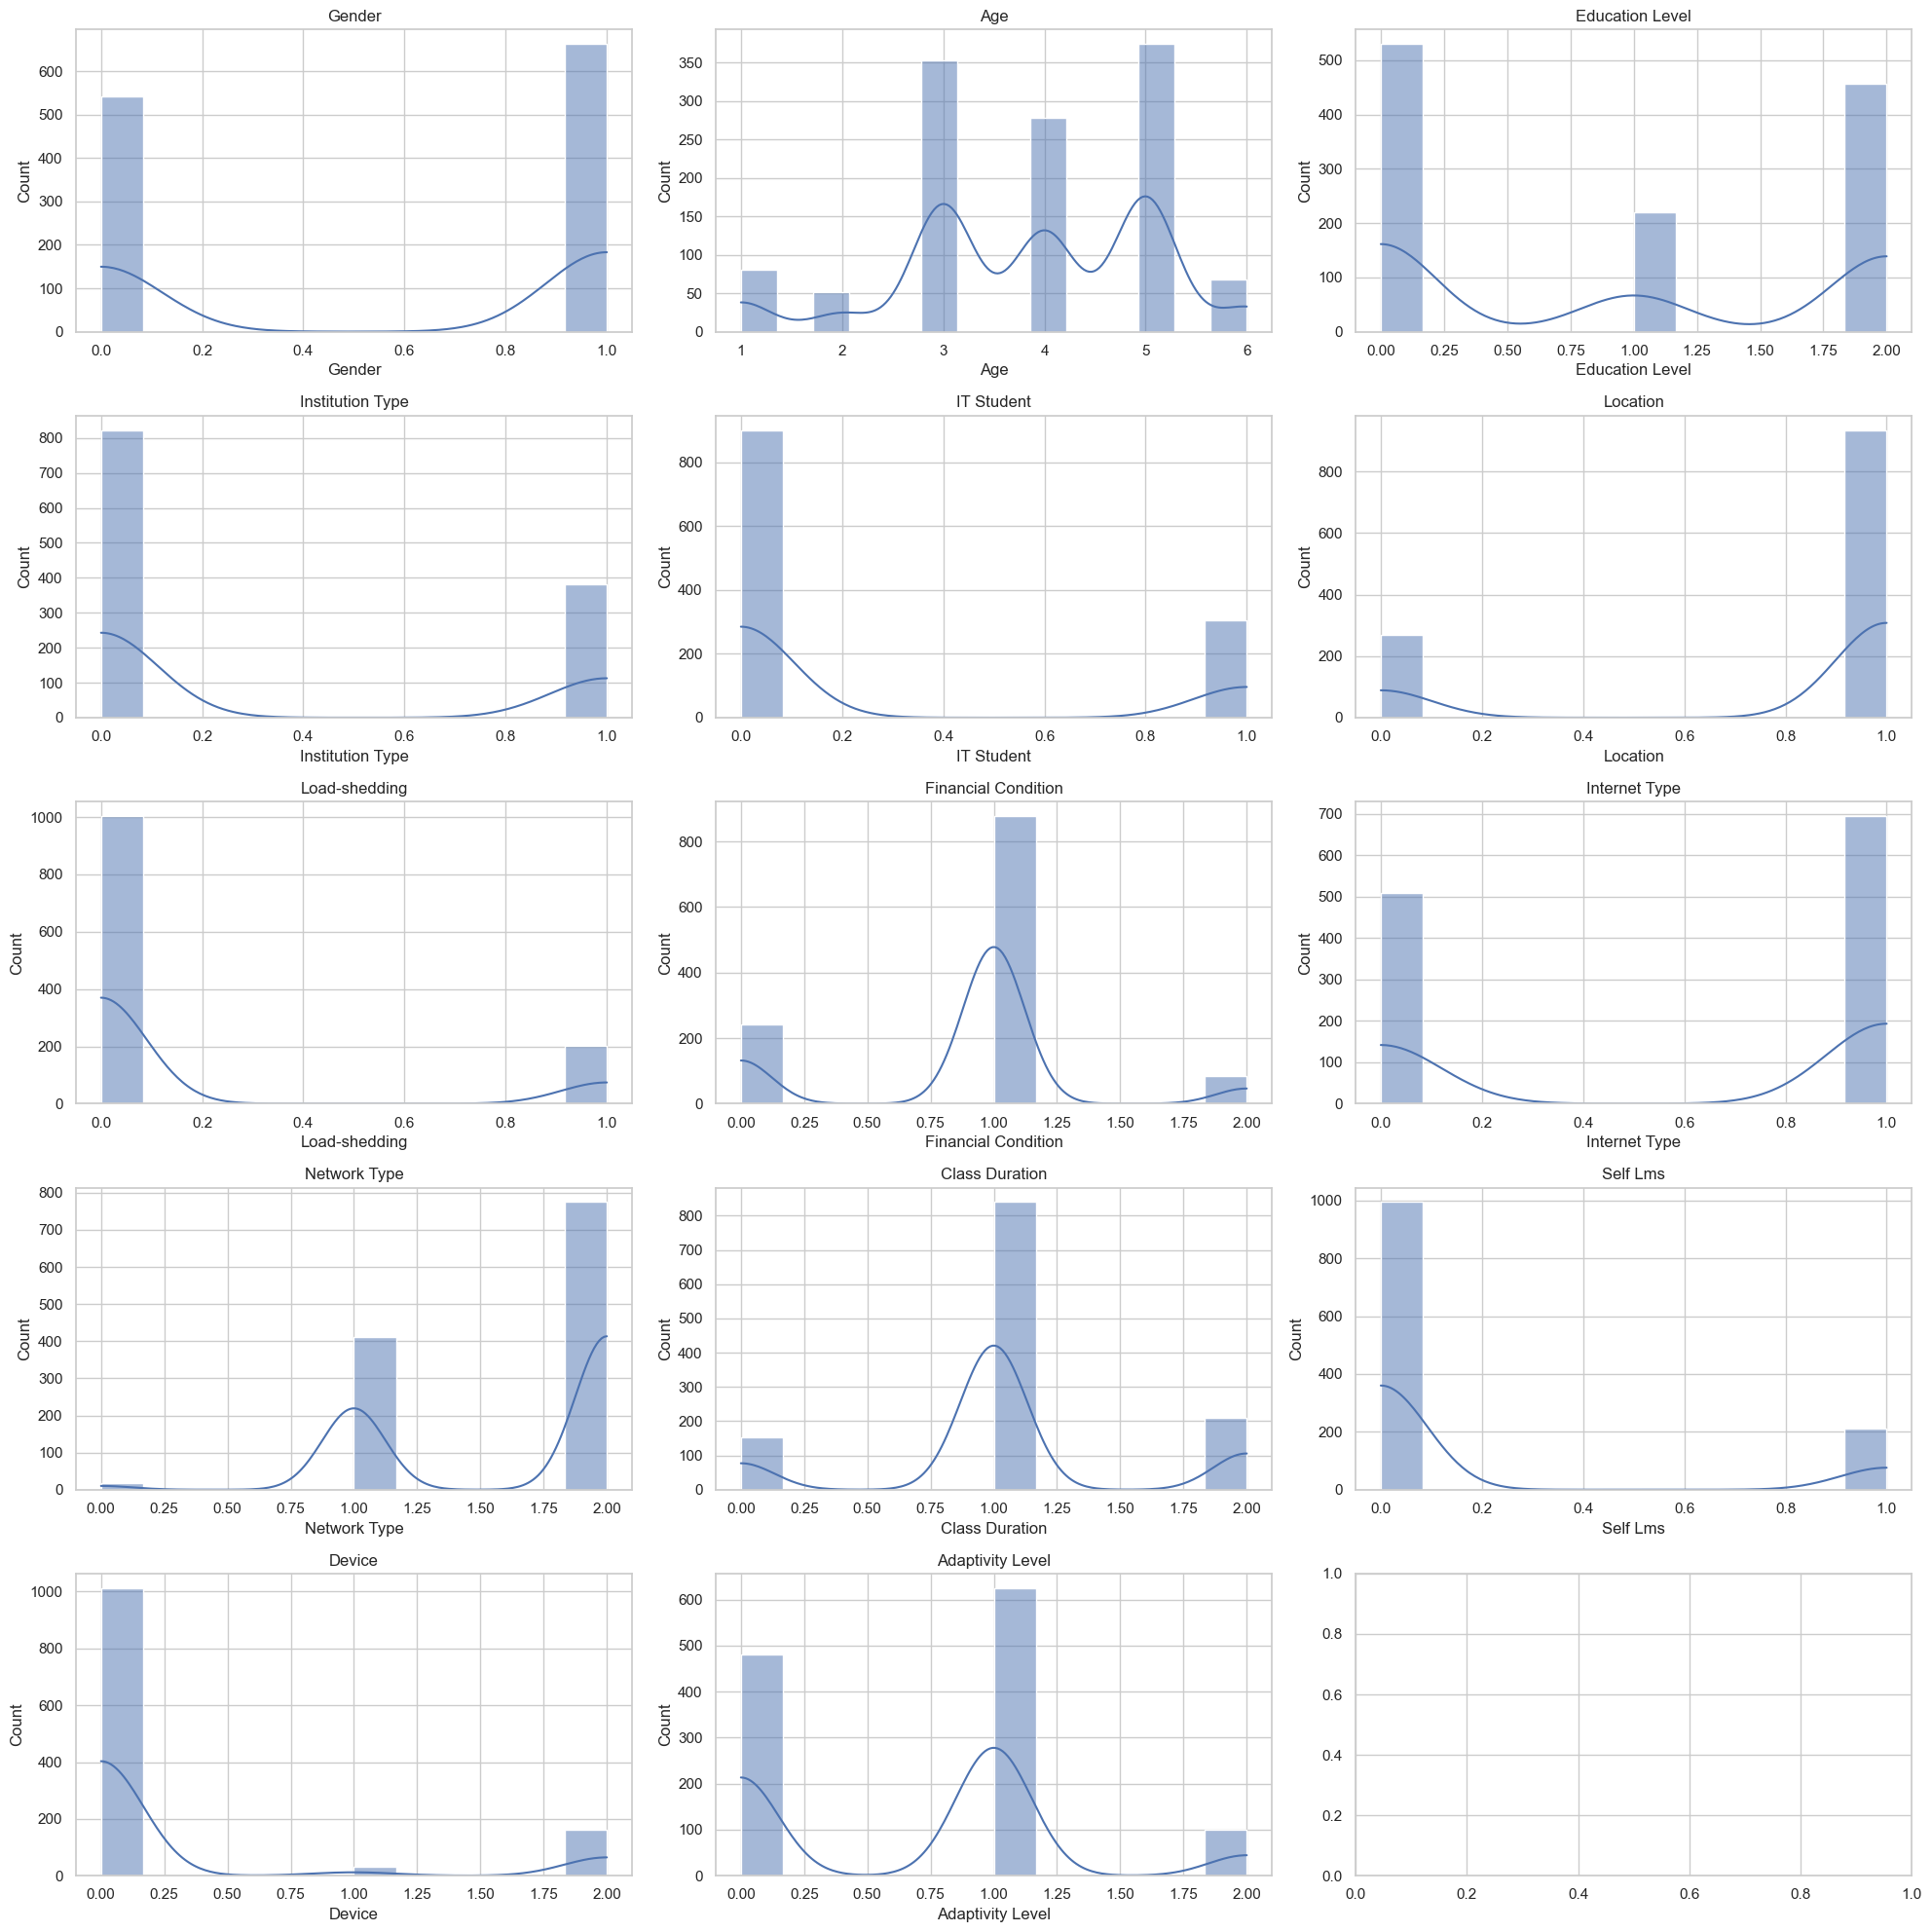

In [138]:
# Plotting distributions of various features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

# Encoding

In [139]:
# Encoding the identified categorical variables
df_encoded = pd.get_dummies(df, columns=['Education Level', 'Financial Condition', 'Network Type', 'Class Duration'])

# Displaying the first few rows of the encoded dataframe
df_encoded

,Gender,Age,Institution Type,IT Student,Location,Load-shedding,Internet Type,Self Lms,Device,Adaptivity Level,Education Level_0,Education Level_1,Education Level_2,Financial Condition_0,Financial Condition_1,Financial Condition_2,Network Type_0,Network Type_1,Network Type_2,Class Duration_0,Class Duration_1,Class Duration_2
0,1,5,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
1,0,5,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0
2,0,4,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
3,0,3,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
4,0,4,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
5,1,3,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
6,1,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0
7,1,3,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
8,1,4,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
9,1,3,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0


Choose a suitable encoding technique for the columns.

# Scaling

In [140]:
# Creating a StandardScaler object
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['Age']

# Applying StandardScaler only to the specified columns
df_scaled = df_encoded.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

# Display the first few rows of the scaled dataframe
df_scaled.head()

,Gender,Age,Institution Type,IT Student,Location,Load-shedding,Internet Type,Self Lms,Device,Adaptivity Level,Education Level_0,Education Level_1,Education Level_2,Financial Condition_0,Financial Condition_1,Financial Condition_2,Network Type_0,Network Type_1,Network Type_2,Class Duration_0,Class Duration_1,Class Duration_2
0,1,0.919975,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
1,0,0.919975,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0
2,0,0.124160,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
3,0,-0.671654,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
4,0,0.124160,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

# Decision Tree



### Train Test Split

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = df_scaled.drop('Adaptivity Level', axis=1)
y = df_scaled['Adaptivity Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

**Use Gini Index**

In [143]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [144]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.8796680497925311, 0.8838174273858921)

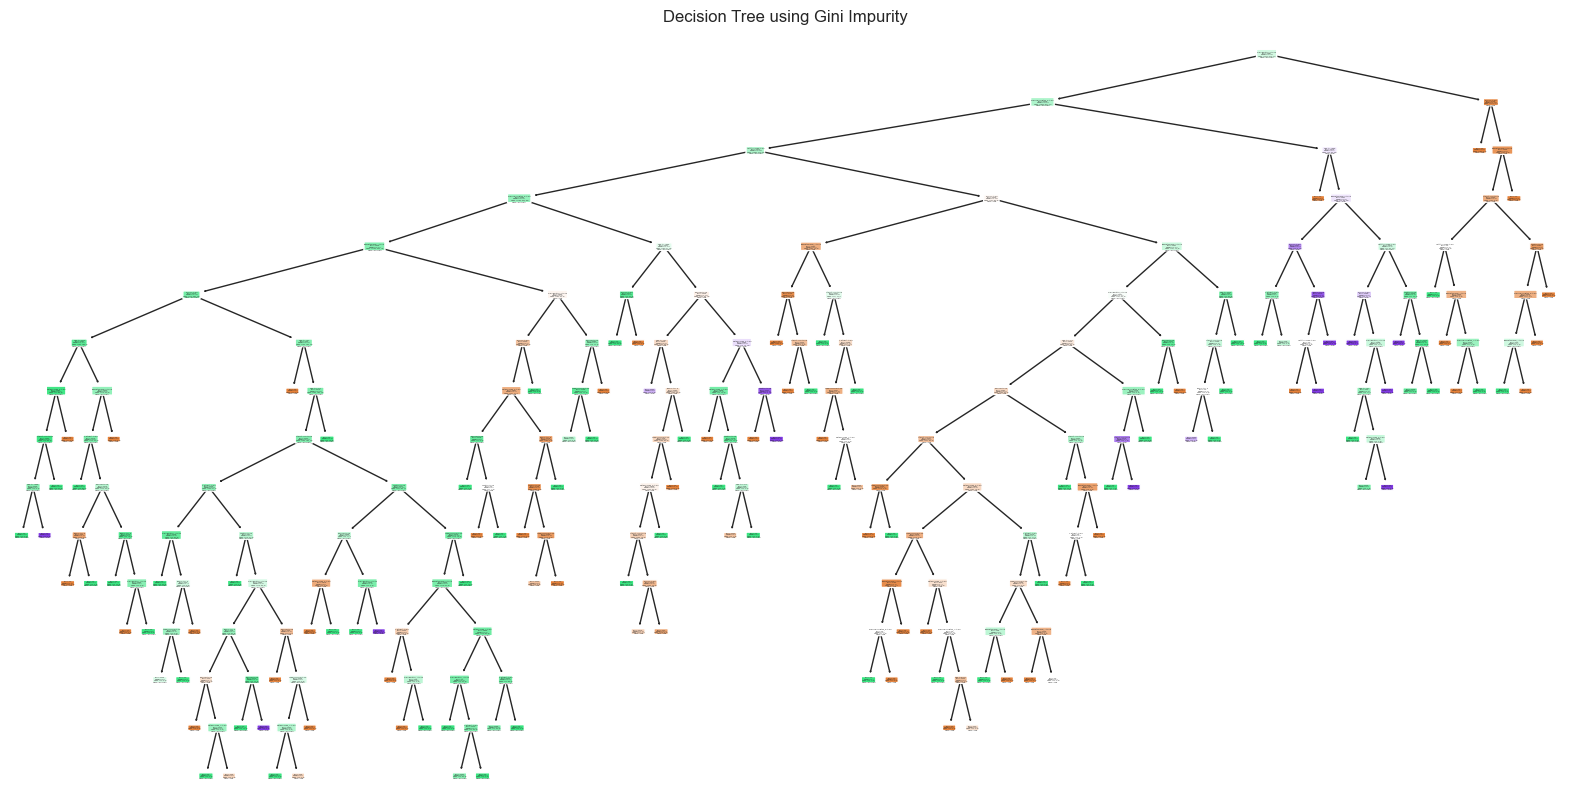

In [145]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_gini and dt_entropy are the trained Decision Tree models

# Visualizing the Decision Tree using Gini impurity
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['Low','Moderate', 'High'], rounded=True)
plt.title("Decision Tree using Gini Impurity")
plt.show()
plt.close()

**Using Entropy**

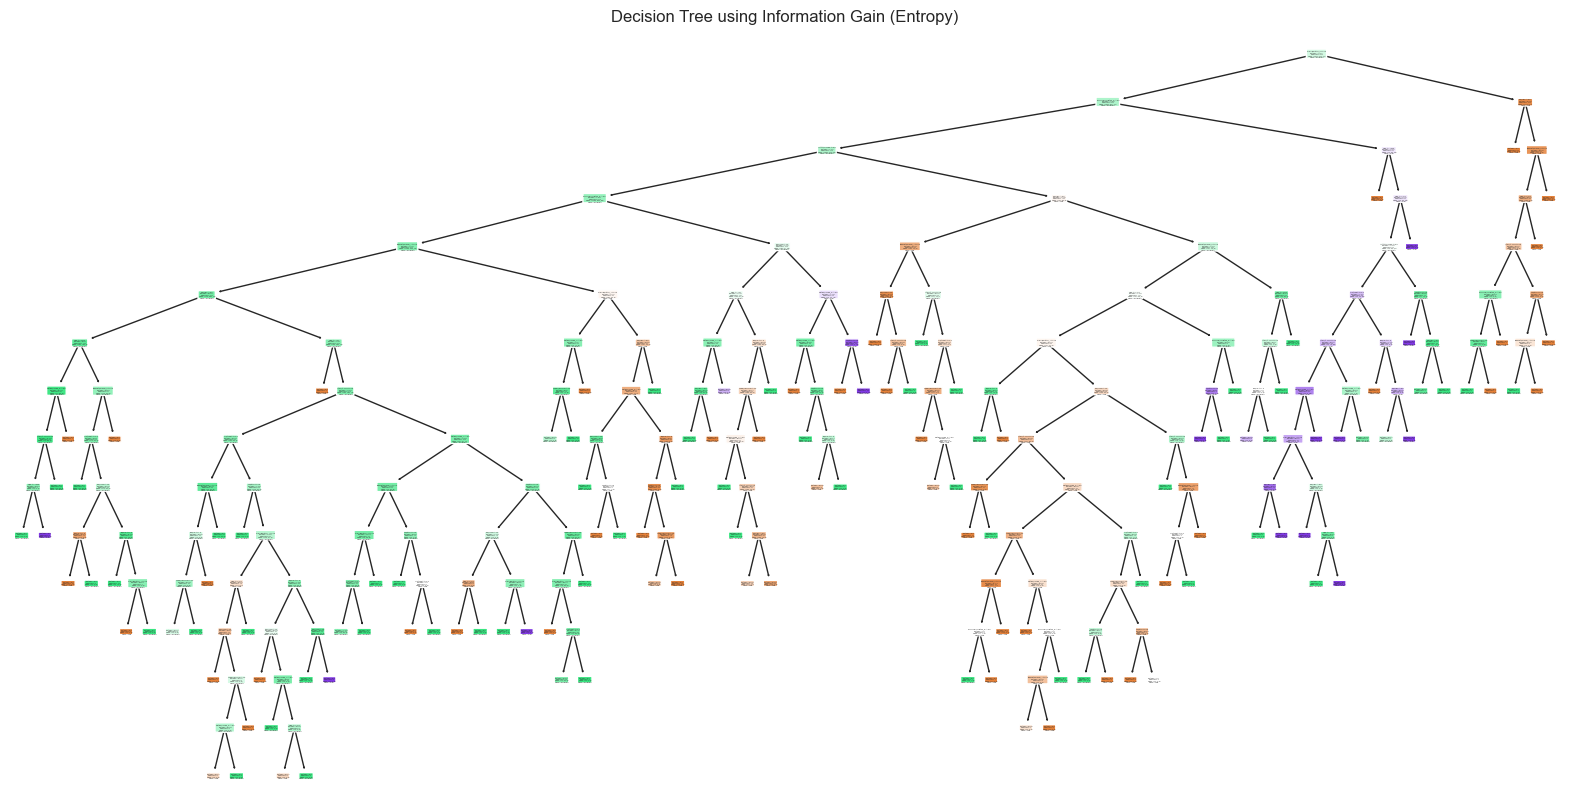

In [111]:
# Visualizing the Decision Tree using Information Gain (Entropy)
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['Low','Moderate', 'High'], rounded=True)
plt.title("Decision Tree using Information Gain (Entropy)")
plt.show()
plt.close()

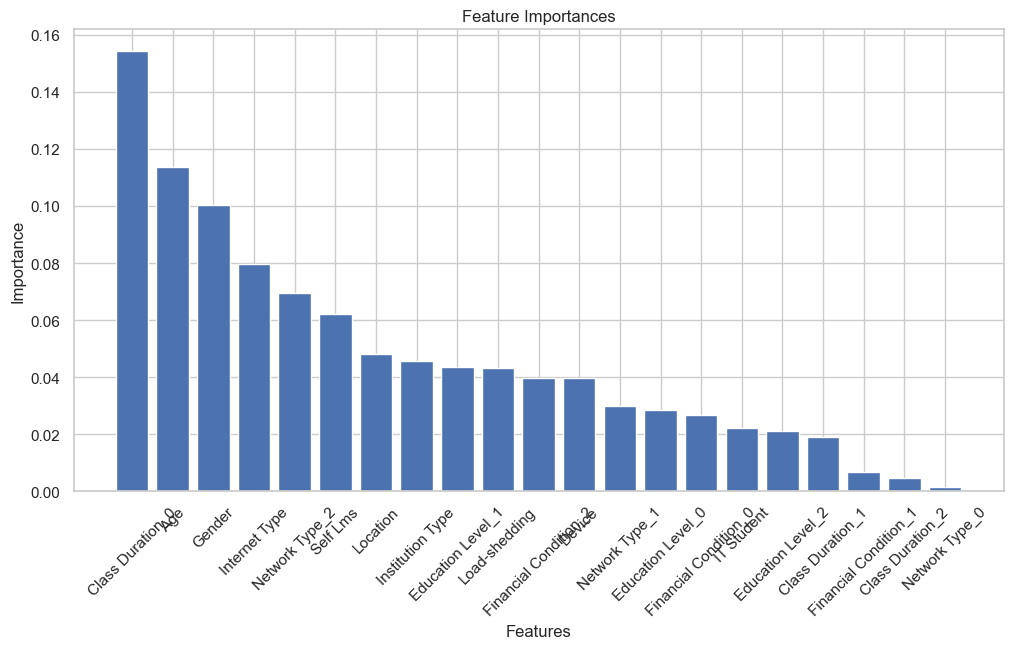

In [115]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataset 'df_encoded' and target variable 'y'

X = df_encoded.drop('Adaptivity Level', axis=1)
y = df_encoded['Adaptivity Level']

# Train a Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)

# Get Feature Importances
importances = dt_model.feature_importances_

# Convert to a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.show()


# KNN

#### Check different distance metric

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Splitting the dataset into features and target variable
X = df.drop('Adaptivity Level', axis=1)
y = df['Adaptivity Level']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(4, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(4, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

# Output the results

Euclidean Accuracy: 0.7842323651452282
Euclidean Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       103
           1       0.79      0.79      0.79       115
           2       0.80      0.35      0.48        23

    accuracy                           0.78       241
   macro avg       0.79      0.67      0.70       241
weighted avg       0.79      0.78      0.78       241

Manhattan Accuracy: 0.7966804979253111
Manhattan Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       103
           1       0.79      0.80      0.79       115
           2       1.00      0.39      0.56        23

    accuracy                           0.80       241
   macro avg       0.86      0.69      0.73       241
weighted avg       0.81      0.80      0.79       241



**Euclidean**

In [122]:
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)


Euclidean Accuracy: 0.7842323651452282
Euclidean Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       103
           1       0.79      0.79      0.79       115
           2       0.80      0.35      0.48        23

    accuracy                           0.78       241
   macro avg       0.79      0.67      0.70       241
weighted avg       0.79      0.78      0.78       241



**Manhattan**

In [123]:
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Manhattan Accuracy: 0.7966804979253111
Manhattan Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       103
           1       0.79      0.80      0.79       115
           2       1.00      0.39      0.56        23

    accuracy                           0.80       241
   macro avg       0.86      0.69      0.73       241
weighted avg       0.81      0.80      0.79       241



Minimum error:- 0.11618257261410789 at K = 0


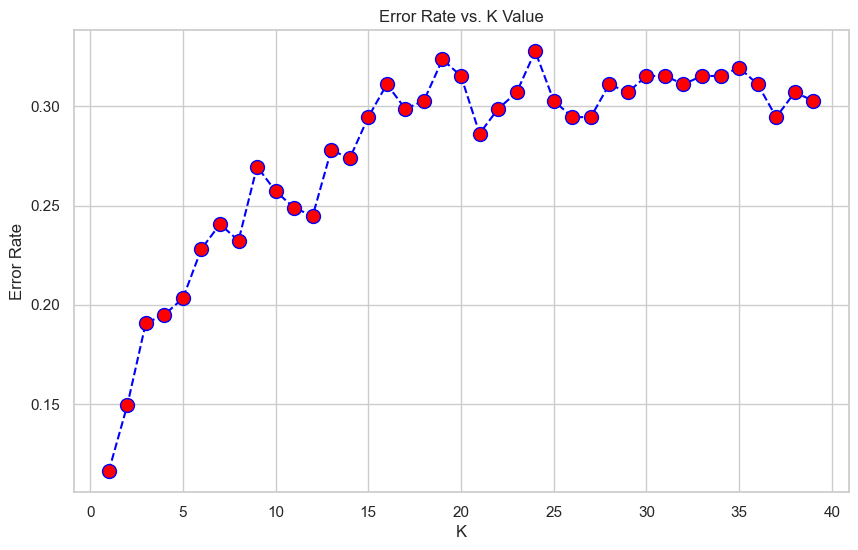

In [120]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8838174273858921 at K = 0


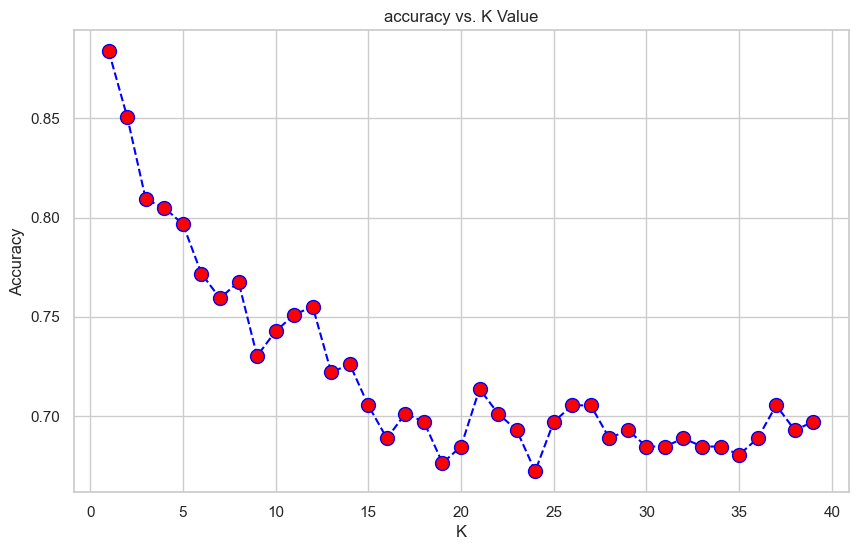

In [121]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

# All the Best!